In [14]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)

In [2]:
tobii_reports = pd.to_datetime(['20150522', '20150805', '20151103', '20160216',
                                '20160504', '20160628', '20161027', '20170215',
                                '20170427', '20170625', '20171026', '20180208',
                                '20180426', '20180620', '20181025', '20190206'])
nordea_reports = pd.to_datetime(['20170126',
                                '20170427', '20170620', '20171026', '20180125',
                                '20180425', '20180619', '20181024', '20190206'])

In [28]:
df = pd.read_csv('NDA_SE-2016-01-01-2019-09-09.csv',sep=';')
#df['open'] = df['Opening price'].str.replace(',','.',).astype(np.float32)
print(df.head())
df['Date'] = pd.to_datetime(df['Date'])
df['dayofweek'] = df['Date'].dt.dayofweek
df = df.set_index('Date')
df = df.sort_index()
df['closing_close_yesterday'] = df['Closing price'].shift(1)
df['close_open_pct_change'] = df['Opening price'].div(df['closing_close_yesterday'])
df.head()

         Date    Bid    Ask  Opening price  High price  Low price  \
0  2019-09-06  64.14  64.16          64.68       65.82      63.83   
1  2019-09-05  64.53  64.56          61.37       64.58      61.35   
2  2019-09-04  60.61  60.64          60.18       61.04      59.90   
3  2019-09-03  59.71  59.73          60.39       60.59      59.59   
4  2019-09-02  60.44  60.45          61.24       61.47      60.39   

   Closing price  Average price  Total volume      Turnover  Trades  \
0          64.10         64.648      10683894  6.906173e+08   14451   
1          64.50         63.639      17101993  1.087903e+09   16431   
2          60.64         60.657       9849865  5.974126e+08    7201   
3          59.73         60.000       7538743  4.523245e+08    9555   
4          60.43         60.770       5736859  3.487995e+08    6233   

   Unnamed: 11  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11,dayofweek,closing_close_yesterday,close_open_pct_change
Date,,,,,,,,,,,,,,
2016-01-04,90.50,90.60,91.90,91.95,90.25,90.55,90.773,6329295,5.745273e+08,6182,NaN,0,NaN,NaN
2016-01-05,90.65,90.70,91.20,91.65,90.35,90.75,90.901,3072859,2.794420e+08,2705,NaN,1,90.55,1.007178
2016-01-07,89.50,89.55,88.95,90.20,86.70,89.50,88.577,17224286,1.526692e+09,12885,NaN,3,90.75,0.980165
2016-01-08,89.00,89.05,89.85,91.40,88.80,88.80,90.093,9827714,8.857143e+08,9098,NaN,4,89.50,1.003911
2016-01-11,89.30,89.35,88.75,89.90,88.60,89.20,89.335,7444638,6.650185e+08,7321,NaN,0,88.80,0.999437


In [29]:
# rename columns
df.rename(columns = {'Average price':'average_price',
                     'Closing price':'closing_price',
                     'Opening price': 'opening_price',
                     'Low price': 'low_price',
                     'Total volume':'total_volume',
                     'Turnover': 'turnover',
                     'Trades': 'trades',
                     'High price':'high_price'}, inplace=True)
df.head()

,Bid,Ask,opening_price,high_price,low_price,closing_price,average_price,total_volume,turnover,trades,Unnamed: 11,dayofweek,closing_close_yesterday,close_open_pct_change
Date,,,,,,,,,,,,,,
2016-01-04,90.50,90.60,91.90,91.95,90.25,90.55,90.773,6329295,5.745273e+08,6182,NaN,0,NaN,NaN
2016-01-05,90.65,90.70,91.20,91.65,90.35,90.75,90.901,3072859,2.794420e+08,2705,NaN,1,90.55,1.007178
2016-01-07,89.50,89.55,88.95,90.20,86.70,89.50,88.577,17224286,1.526692e+09,12885,NaN,3,90.75,0.980165
2016-01-08,89.00,89.05,89.85,91.40,88.80,88.80,90.093,9827714,8.857143e+08,9098,NaN,4,89.50,1.003911
2016-01-11,89.30,89.35,88.75,89.90,88.60,89.20,89.335,7444638,6.650185e+08,7321,NaN,0,88.80,0.999437


In [30]:
agg = {'close_open_pct_change':['mean','std']}
df.groupby('dayofweek').agg(agg)

close_open_pct_change          
                           mean       std
dayofweek                                
0                      1.001267  0.008202
1                      1.000689  0.006589
2                      1.000477  0.006688
3                      1.000092  0.008403
4                      0.999664  0.011678

In [31]:
df['n_turnover'] = (df['turnover'] - df['turnover'].min())/(df['turnover'].max()-df['turnover'].min())
df['n_trades'] = (df['trades'] - df['trades'].min())/(df['trades'].max()-df['trades'].min())

df['n_turnover_rol'] = df['n_turnover'].rolling(90).mean()

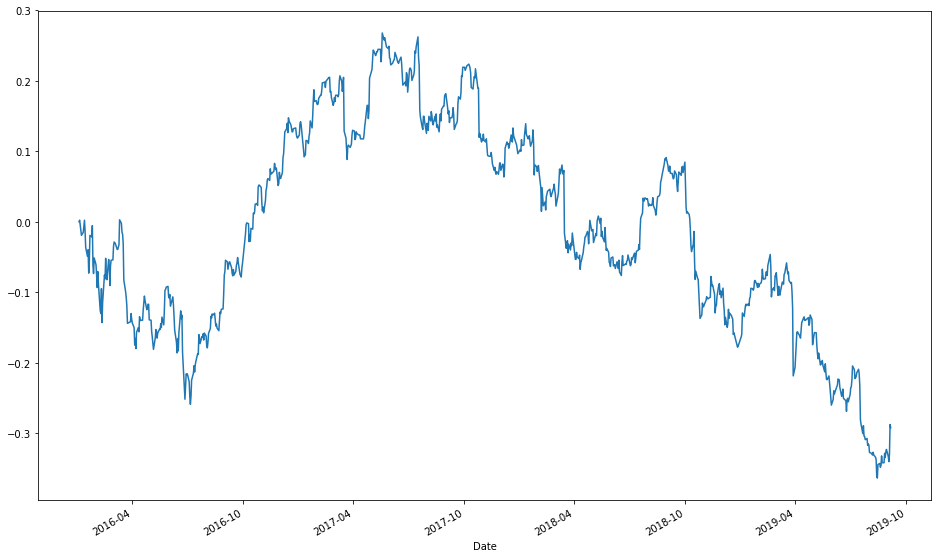

In [32]:
df['closing_price'].div(df['closing_price'].iloc[0]).sub(1).plot()

In [33]:
thresh = 0.15
df['closing_price_adjusted'] = df['closing_price']
df.loc[df['n_turnover']<df['n_turnover_rol'], 'closing_price_adjusted'] = np.nan
#df['no_correction'] 
df = df.merge(df['closing_price_adjusted'].dropna().reset_index().reset_index().set_index('Date')['index'].rename('no_correction').to_frame(),
             how='left', left_index=True, right_index=True)
df.head()

,Bid,Ask,opening_price,high_price,low_price,closing_price,average_price,total_volume,turnover,trades,Unnamed: 11,dayofweek,closing_close_yesterday,close_open_pct_change,n_turnover,n_trades,n_turnover_rol,closing_price_adjusted,no_correction
Date,,,,,,,,,,,,,,,,,,,
2016-01-04,90.50,90.60,91.90,91.95,90.25,90.55,90.773,6329295,5.745273e+08,6182,NaN,0,NaN,NaN,0.113899,0.081436,NaN,90.55,0.0
2016-01-05,90.65,90.70,91.20,91.65,90.35,90.75,90.901,3072859,2.794420e+08,2705,NaN,1,90.55,1.007178,0.020200,0.011745,NaN,90.75,1.0
2016-01-07,89.50,89.55,88.95,90.20,86.70,89.50,88.577,17224286,1.526692e+09,12885,NaN,3,90.75,0.980165,0.416243,0.215786,NaN,89.50,2.0
2016-01-08,89.00,89.05,89.85,91.40,88.80,88.80,90.093,9827714,8.857143e+08,9098,NaN,4,89.50,1.003911,0.212711,0.139882,NaN,88.80,3.0
2016-01-11,89.30,89.35,88.75,89.90,88.60,89.20,89.335,7444638,6.650185e+08,7321,NaN,0,88.80,0.999437,0.142633,0.104265,NaN,89.20,4.0


In [34]:
df['closing_price_adjusted'] = df['closing_price_adjusted'].ffill()
corr_day = df['closing_price_adjusted'].diff().replace(0,np.nan).dropna()
#df.loc[df.index.isin(corr_day.index), 'closing_price_adjusted'] = np.nan
df['days_since_correction'] = df.groupby('closing_price_adjusted').cumcount()
df['correction_day'] = 0
df.loc[df.index.isin(corr_day.index), 'correction_day'] = 1
df['no_correction'] = df['correction_day'].cumsum()
df['closing_price_adjusted_pct_diff'] = df['closing_price_adjusted'].div(df['closing_price']) - 1
df.head()

,Bid,Ask,opening_price,high_price,low_price,closing_price,average_price,total_volume,turnover,trades,...,closing_close_yesterday,close_open_pct_change,n_turnover,n_trades,n_turnover_rol,closing_price_adjusted,no_correction,days_since_correction,correction_day,closing_price_adjusted_pct_diff
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,90.50,90.60,91.90,91.95,90.25,90.55,90.773,6329295,5.745273e+08,6182,...,NaN,NaN,0.113899,0.081436,NaN,90.55,0,0,0,0.0
2016-01-05,90.65,90.70,91.20,91.65,90.35,90.75,90.901,3072859,2.794420e+08,2705,...,90.55,1.007178,0.020200,0.011745,NaN,90.75,1,0,1,0.0
2016-01-07,89.50,89.55,88.95,90.20,86.70,89.50,88.577,17224286,1.526692e+09,12885,...,90.75,0.980165,0.416243,0.215786,NaN,89.50,2,0,1,0.0
2016-01-08,89.00,89.05,89.85,91.40,88.80,88.80,90.093,9827714,8.857143e+08,9098,...,89.50,1.003911,0.212711,0.139882,NaN,88.80,3,0,1,0.0
2016-01-11,89.30,89.35,88.75,89.90,88.60,89.20,89.335,7444638,6.650185e+08,7321,...,88.80,0.999437,0.142633,0.104265,NaN,89.20,4,0,1,0.0


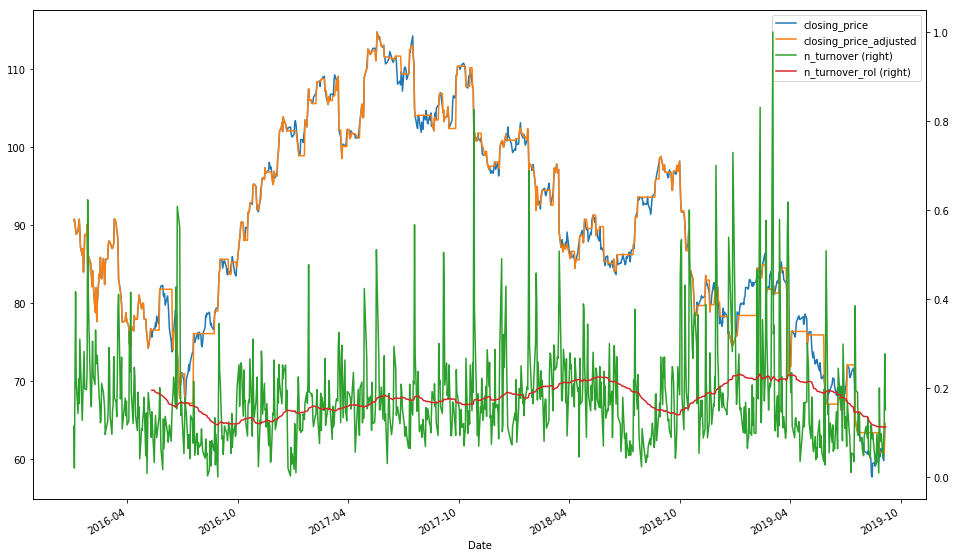

In [35]:
ax = df[['closing_price',
         'closing_price_adjusted',
         'n_turnover',
         'n_turnover_rol']].plot(secondary_y = ['n_turnover', 'n_turnover_rol'])

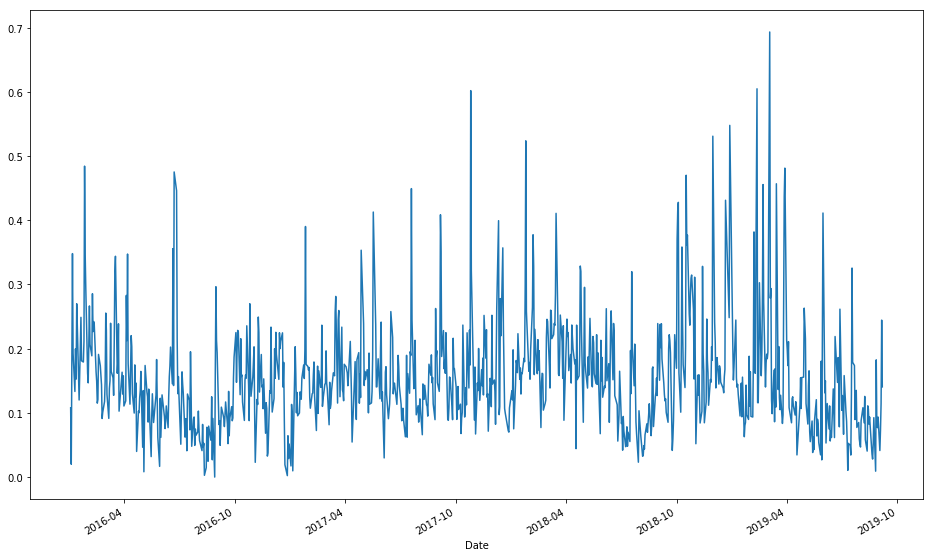

In [36]:
df['n_turnover'].apply('log1p').plot()

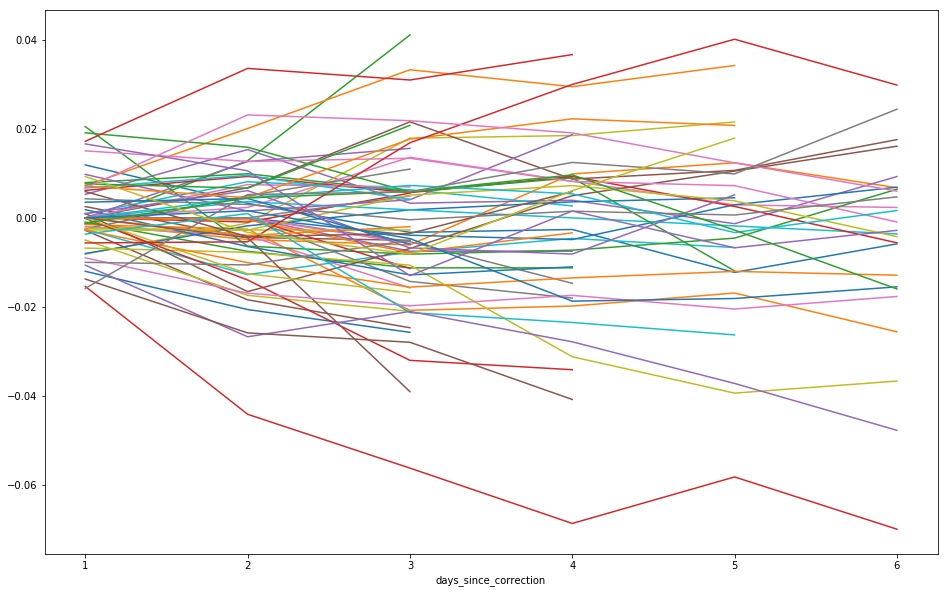

In [39]:
df_temp = (
df[(df['days_since_correction']<7) & 
   (df['days_since_correction']>0)].groupby(['no_correction',
                                            'days_since_correction'])['closing_price_adjusted_pct_diff'].sum().unstack(level=0)
)

corr_index = df_temp.loc[3].dropna().index

df_temp.loc[0:,corr_index].plot(legend=False)

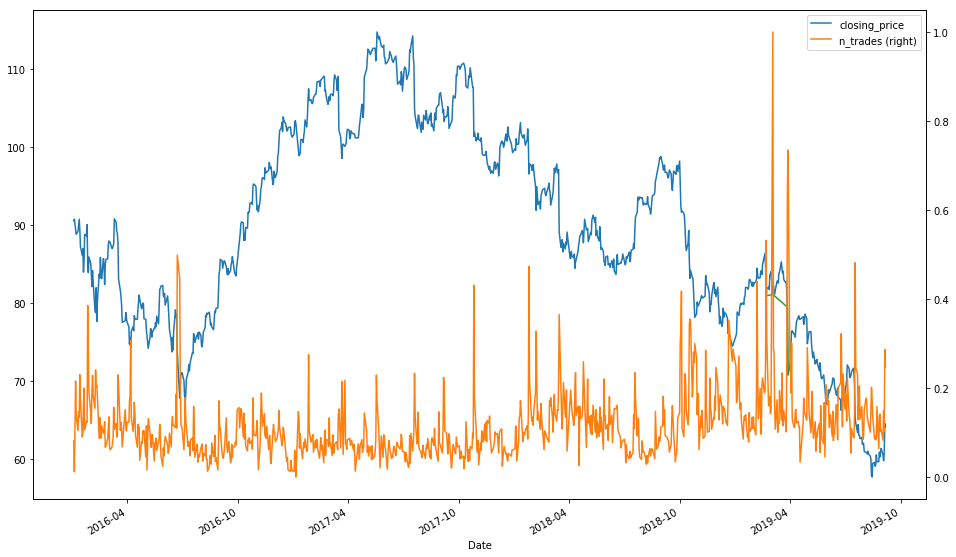

In [40]:
ax = df[['closing_price', 'n_trades']].plot(secondary_y = 'n_trades')
#for date in nordea_reports:
#    ax.axvline(date,ls='--', c='r', alpha = 0.2)

df[df['n_trades']>0.5]['closing_price'].plot(ax=ax)

In [177]:
df_sal = pd.DataFrame(data = np.arange(1,30,1), columns=['year'])
df_sal['save'] = 24000*12
df_sal.head()

,year,save
0,1,288000
1,2,288000
2,3,288000
3,4,288000
4,5,288000


In [178]:
start = 400000

df_sal['return'] = 1.08**df_sal['year']
df_sal['start_return'] = start*df_sal['return']
df_sal['year_return'] = df_sal['return']*df_sal['save']
df_sal['balance'] = df_sal['year_return'].cumsum()+df_sal['start_return']
df_sal

,year,save,return,start_return,year_return,balance
0,1,288000,1.080000,4.320000e+05,3.110400e+05,7.430400e+05
1,2,288000,1.166400,4.665600e+05,3.359232e+05,1.113523e+06
2,3,288000,1.259712,5.038848e+05,3.627971e+05,1.513645e+06
3,4,288000,1.360489,5.441956e+05,3.918208e+05,1.945777e+06
4,5,288000,1.469328,5.877312e+05,4.231665e+05,2.412479e+06
5,6,288000,1.586874,6.347497e+05,4.570198e+05,2.916517e+06
6,7,288000,1.713824,6.855297e+05,4.935814e+05,3.460878e+06
7,8,288000,1.850930,7.403721e+05,5.330679e+05,4.048789e+06
8,9,288000,1.999005,7.996019e+05,5.757133e+05,4.683732e+06
9,10,288000,2.158925,8.635700e+05,6.217704e+05,5.369470e+06
